# Predict the impact of the incident raised by the customer.



In [126]:
#Import Libraries
import pandas as pd
import numpy as np
#import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

## The data
Let's start by reading in the incident_event_log.csv file into a pandas dataframe.

In [127]:
#Load the Data
data= pd.read_csv("incident_event_log.csv")

In [128]:
data.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29-02-2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,01-03-2016 09:52,06-03-2016 10:00


In [129]:
data.shape

(141712, 36)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [131]:
data[data.duplicated()].shape

(0, 36)

In [132]:
data.columns.nunique()

36

In [133]:
data.columns.unique()

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [134]:
#To find unique values in columns
data_dict = dict(zip([i for i in data.columns] , [pd.DataFrame(data[i].unique(), columns=[i]) for i in data.columns]))
for data_dict in data:
    print ('\nFrequency of Categories for varible %s'%data_dict)
    print (data[data_dict].value_counts())


Frequency of Categories for varible number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0012729     2
INC0002823     2
INC0026215     2
INC0003569     2
INC0013821     2
Name: number, Length: 24918, dtype: int64

Frequency of Categories for varible incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

Frequency of Categories for varible active
True     116726
False     24986
Name: active, dtype: int64

Frequency of Categories for varible reassignment_count
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
1

code 6     86583
code 7     20733
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

Frequency of Categories for varible resolved_by
Resolved by 15     15421
Resolved by 11     12050
Resolved by 103     5360
Resolved by 177     3811
Resolved by 53      3637
                   ...  
Resolved by 17         4
Resolved by 222        4
Resolved by 48         3
Resolved by 39         3
Resolved by 185        3
Name: resolved_by, Length: 217, dtype: int64

Frequency of Categories for varible resolved_at
?                   3141
03-06-2016 16:29      93
03-06-2016 16:28      85
03-06-2016 16:27      83
03-06-2016 16:31      59
                    ... 
23-03-2016 11:04       2
17-03-2016 10:21       2
01-04-2016 09:54       2
05-05-2016 16:05   

In [135]:
data_cleaned= data.copy()

## replacing the '?' values with np.nan

In [136]:
data_cleaned.replace('?', np.nan, inplace=True)

In [137]:
data_cleaned.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [138]:
data_cleaned.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29-02-2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,01-03-2016 09:52,06-03-2016 10:00


## Changing the datatype for the opening and closing columns

In [139]:
columns_to_change_to_datetime = ['closed_at', 'opened_at' ]

for i in columns_to_change_to_datetime:
    data_cleaned[i] = data_cleaned[i].astype('datetime64[ns]')

In [140]:
data_cleaned.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at                     object
sys_updated_by                     object
sys_updated_at                     object
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
cmdb_ci                            object
impact                             object
urgency                            object
priority                           object
assignment_group                  

In [141]:
print('percentage of missing values'.upper())
data_cleaned.isna().sum()/data_cleaned.shape[0]*100

PERCENTAGE OF MISSING VALUES


number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

<AxesSubplot:>

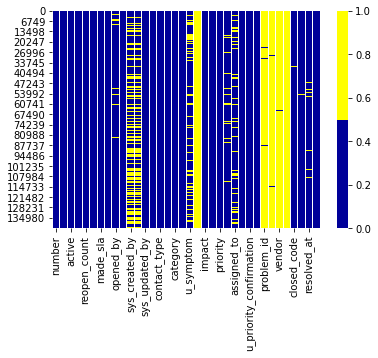

In [142]:
import seaborn as sns
cols = data_cleaned.columns
colours = ['#000099','#ffff00']      
sns.heatmap(data_cleaned[cols].isnull(),
           cmap=sns.color_palette(colours))

## dropping colmns with more than 90% missing values

In [143]:
drop = ['caused_by', 'rfc', 'vendor','cmdb_ci','problem_id','made_sla']
data_cleaned.drop(drop,axis=1,inplace=True)

In [144]:
data_cleaned.shape

(141712, 30)

In [145]:
data_cleaned.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,opened_at,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29-02-2016 11:29,2016-05-03 12:00:00
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29-02-2016 11:29,2016-05-03 12:00:00
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29-02-2016 11:29,2016-05-03 12:00:00
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29-02-2016 11:29,2016-05-03 12:00:00
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,01-03-2016 09:52,2016-06-03 10:00:00


## Fillna

In [146]:
data_cleaned.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at                      0
dtype: int

<AxesSubplot:>

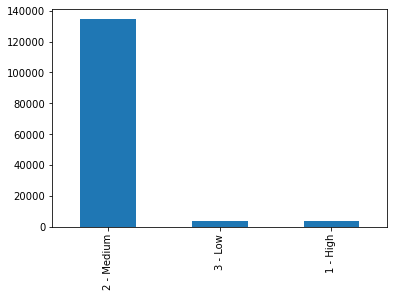

In [147]:
data_cleaned['impact'].value_counts().plot.bar()

In [148]:
data_cleaned['impact'].value_counts()

2 - Medium    134335
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

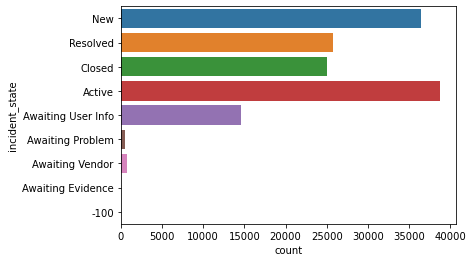

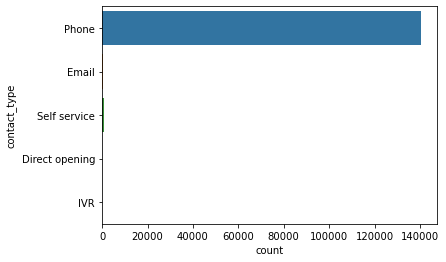

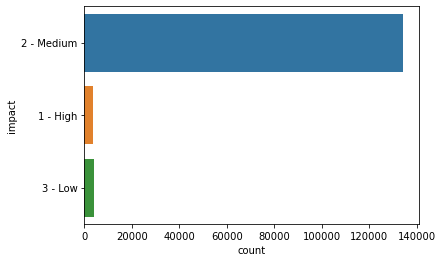

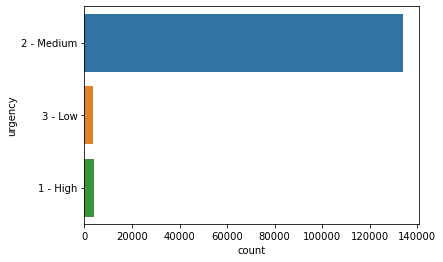

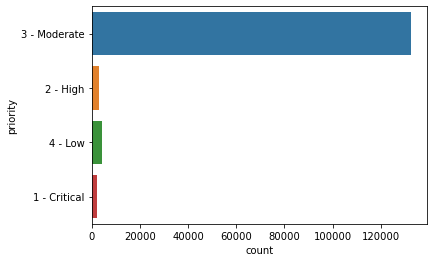

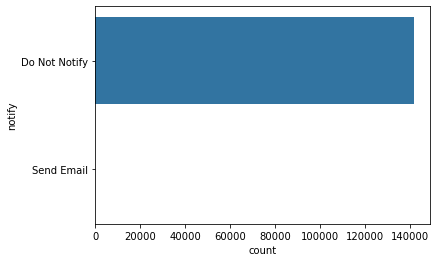

In [149]:
import matplotlib.pyplot as plt
for column in data_cleaned.select_dtypes(include='object'):
    if data_cleaned[column].nunique() < 10:
        sns.countplot(y=column, data=data_cleaned)
        plt.show()

#### Creating new class for the missing columns

In [150]:
# creating a neww class for missing values  for caller id
data_cleaned['caller_id'].fillna(value='caller 4340',inplace=True)

# creating a neww class for missing values for opened by
data_cleaned['opened_by'].fillna(value = 'Opened by 4341', inplace=True)

# creating a neww class for missing values for sys created by
data_cleaned['sys_created_by'].fillna(value='Created by 4342', inplace=True)

# creating a neww class for missing values for location
data_cleaned['location'].fillna('Location 4343', inplace=True)

# creating a neww class for missing values for category
data_cleaned['category'].fillna('Category 4344',inplace=True)

# creating a neww class for missing values for subcategory
data_cleaned['subcategory'].fillna(value='Subcategory 4345',inplace=True)

# creating a neww class for missing values for symptoms
data_cleaned['u_symptom'].fillna(value='Symptom 4346', inplace=True)

# creating a neww class for missing values for assignment group
data_cleaned['assignment_group'].fillna(value='Group 4347',inplace=True)

# creating a neww class for missing values for resolver
data_cleaned['assigned_to'].fillna(value='Resolver 4348',inplace=True)


# replacing with mode
#data_cleaned['closed_code'].fillna(data_cleaned['closed_code'].mode()[0],inplace=True)
data_cleaned['resolved_by'].fillna(data_cleaned['resolved_by'].mode()[0],inplace=True)

In [151]:
data_cleaned.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
caller_id                      0
opened_by                      0
opened_at                      0
sys_created_by                 0
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                       0
category                       0
subcategory                    0
u_symptom                      0
impact                         0
urgency                        0
priority                       0
assignment_group               0
assigned_to                    0
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                    0
resolved_at                 3141
closed_at                      0
dtype: int

### Drop the columns whose date is missing

In [152]:
drop = ['resolved_at','closed_code']
data_cleaned.drop(drop,axis=1,inplace=True)

## Encoding the features

In [153]:
le = LabelEncoder()
le

LabelEncoder()

In [154]:
columns_to_be_label_encoded =['active',
                         'contact_type',
                         'knowledge',
                         'u_priority_confirmation',
                         'notify',
                         'incident_state',
                         'caller_id',
                         'opened_by',
                         'sys_created_by',
                         'sys_updated_by',
                         'location',
                         'category',
                         'subcategory',
                         'u_symptom',
                         'assignment_group',
                         'assigned_to',
                         'resolved_by',
                         'number',
                        'impact',
                        'urgency',
                        'priority']

In [155]:
for i in columns_to_be_label_encoded:
    data_cleaned[i] = le.fit_transform(data_cleaned[i])

In [156]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  int32         
 1   incident_state           141712 non-null  int32         
 2   active                   141712 non-null  int64         
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   caller_id                141712 non-null  int32         
 7   opened_by                141712 non-null  int32         
 8   opened_at                141712 non-null  datetime64[ns]
 9   sys_created_by           141712 non-null  int32         
 10  sys_created_at           88636 non-null   object        
 11  sys_updated_by           141712 non-null  int32         
 12  sys_updated_at  

In [157]:
###using ordinal Encoding for the ordinal Data 

In [158]:
#columns_to_be_ordinal_encoded = ['impact','urgency','priority']
#from sklearn.preprocessing import OrdinalEncoder
#oe = OrdinalEncoder()

#for i in columns_to_be_ordinal_encoded:
    #data_cleaned[i] = oe.fit_transform(data_cleaned[i].values.reshape(-1,1))

In [159]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  int32         
 1   incident_state           141712 non-null  int32         
 2   active                   141712 non-null  int64         
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   caller_id                141712 non-null  int32         
 7   opened_by                141712 non-null  int32         
 8   opened_at                141712 non-null  datetime64[ns]
 9   sys_created_by           141712 non-null  int32         
 10  sys_created_at           88636 non-null   object        
 11  sys_updated_by           141712 non-null  int32         
 12  sys_updated_at  

In [160]:
data_cleaned.tail()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,opened_at,sys_created_by,...,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,resolved_by,closed_at
141707,24916,6,0,1,0,4,168,9,2017-02-16 09:09:00,134,...,1,1,2,23,0,0,1,0,205,2017-02-16 09:53:00
141708,24917,1,1,0,0,0,168,9,2017-02-16 14:17:00,134,...,1,1,2,64,0,0,0,0,205,2017-02-16 16:38:00
141709,24917,1,1,1,0,1,168,9,2017-02-16 14:17:00,134,...,1,1,2,23,181,0,0,0,205,2017-02-16 16:38:00
141710,24917,8,1,1,0,2,168,9,2017-02-16 14:17:00,134,...,1,1,2,23,0,0,1,0,205,2017-02-16 16:38:00
141711,24917,6,0,1,0,3,168,9,2017-02-16 14:17:00,134,...,1,1,2,23,0,0,1,0,205,2017-02-16 16:38:00


## Data visualizations

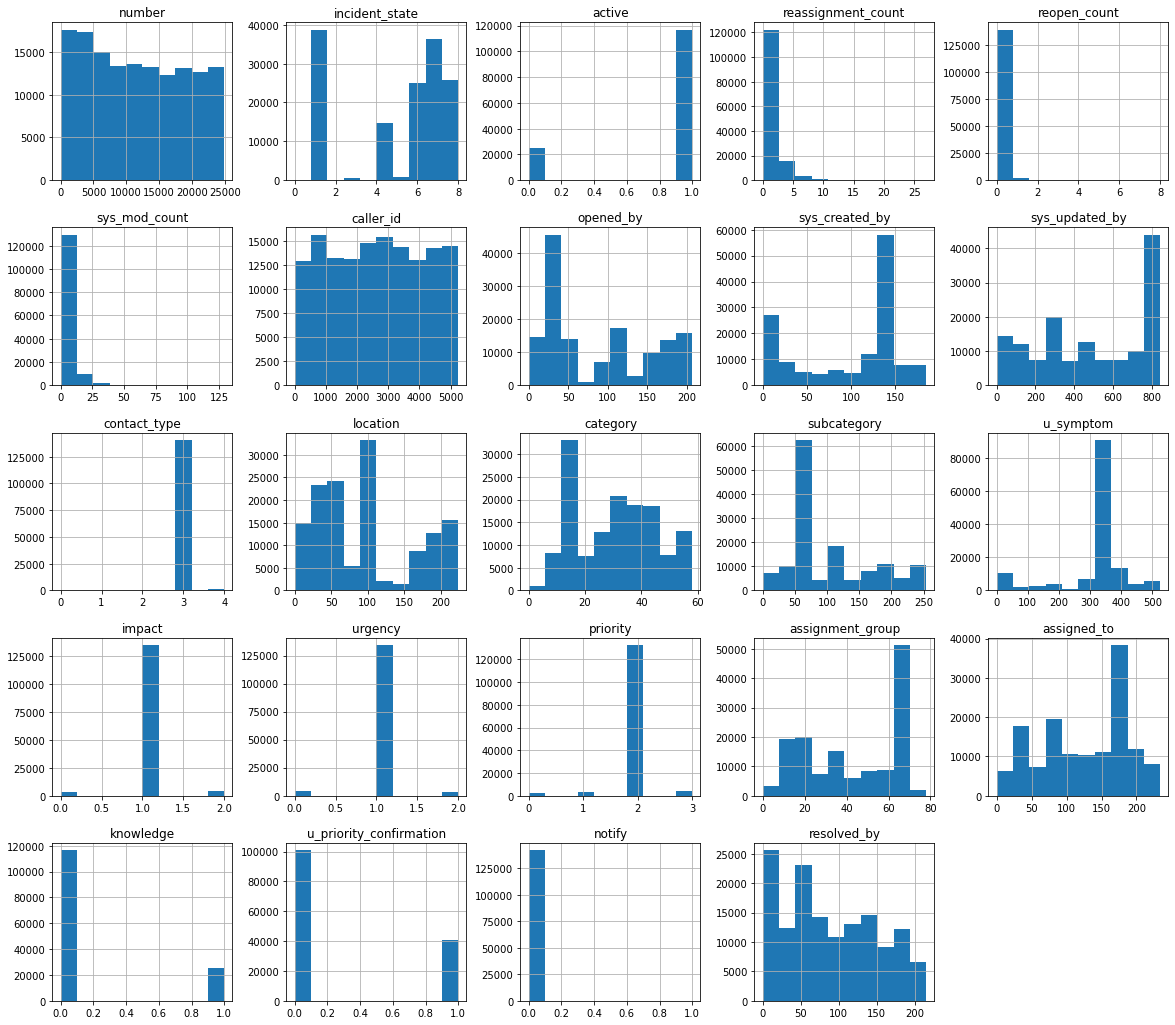

In [161]:
# histograms
data_cleaned.hist(figsize=(20, 18))
pyplot.show()

In [162]:
for column in data_cleaned.select_dtypes(include='object'):
    if data_cleaned[column].nunique() < 10:
        sns.countplot(y=column, data=data_cleaned)
        plt.show()

In [163]:
# Scatterplot Matrix
#from pandas.plotting import scatter_matrix

#scatter_matrix(data_cleaned)
#pyplot.show()

In [164]:
#Heat-Map
#import seaborn as sns
#cols = data_cleaned.columns
#colours = ['#ffff00','#000099']
#sns.heatmap(data_cleaned[cols].isnull(),
           #cmap=sns.color_palette(colours))

## different column has been created for day,date & year inorder to perform feature selection

In [165]:
#data_cleaned["updated_day"]=pd.to_datetime(data_cleaned.sys_updated_at).dt.day
#data_cleaned["updated_month"]=pd.to_datetime(data_cleaned.sys_updated_at).dt.month
#data_cleaned["updated_year"]=pd.to_datetime(data_cleaned.sys_updated_at).dt.year
#data_cleaned["updated_hr"]=pd.to_datetime(data_cleaned.sys_updated_at).dt.hour
#data_cleaned["updated_minute"]=pd.to_datetime(data_cleaned.sys_updated_at).dt.minute

data_cleaned["opened_at_day"]=pd.to_datetime(data_cleaned.opened_at).dt.day
data_cleaned["opened_at_month"]=pd.to_datetime(data_cleaned.opened_at).dt.month
data_cleaned["opened_at_year"]=pd.to_datetime(data_cleaned.opened_at).dt.year
data_cleaned["opened_at_hr"]=pd.to_datetime(data_cleaned.opened_at).dt.hour
data_cleaned["opened_at_minute"]=pd.to_datetime(data_cleaned.opened_at).dt.minute

data_cleaned["closed_at_day"]=pd.to_datetime(data_cleaned.closed_at).dt.day
data_cleaned["closed_at_month"]=pd.to_datetime(data_cleaned.closed_at).dt.month
data_cleaned["closed_at_year"]=pd.to_datetime(data_cleaned.closed_at).dt.year
data_cleaned["closed_at_hr"]=pd.to_datetime(data_cleaned.closed_at).dt.hour
data_cleaned["closed_at_minute"]=pd.to_datetime(data_cleaned.closed_at).dt.minute

#data_cleaned["created_at_day"]=pd.to_datetime(data_cleaned.sys_created_at).dt.day
#data_cleaned["created_at_month"]=pd.to_datetime(data_cleaned.sys_created_at).dt.month
#data_cleaned["created_at_year"]=pd.to_datetime(data_cleaned.sys_created_at).dt.year
#data_cleaned["created_at_hr"]=pd.to_datetime(data_cleaned.sys_created_at).dt.hour
#data_cleaned["created_at_minute"]=pd.to_datetime(data_cleaned.sys_created_at).dt.minute

In [166]:
data_cleaned.drop(['opened_at','closed_at'],axis=1,inplace=True)

In [167]:
data_cleaned.drop(['sys_updated_at','sys_created_at'],axis=1,inplace=True)

In [168]:
data_cleaned.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,sys_created_by,sys_updated_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,closed_at_day,closed_at_month,closed_at_year,closed_at_hr,closed_at_minute
0,0,7,1,0,0,0,1462,200,152,104,...,29,2,2016,1,16,3,5,2016,12,0
1,0,8,1,0,0,2,1462,200,152,509,...,29,2,2016,1,16,3,5,2016,12,0
2,0,8,1,0,0,3,1462,200,152,658,...,29,2,2016,1,16,3,5,2016,12,0
3,0,6,0,0,0,4,1462,200,152,762,...,29,2,2016,1,16,3,5,2016,12,0
4,1,7,1,0,0,0,1462,120,58,605,...,29,2,2016,4,40,3,6,2016,10,0


In [169]:
data_cleaned.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'caller_id', 'opened_by',
       'sys_created_by', 'sys_updated_by', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'resolved_by', 'opened_at_day',
       'opened_at_month', 'opened_at_year', 'opened_at_hr', 'opened_at_minute',
       'closed_at_day', 'closed_at_month', 'closed_at_year', 'closed_at_hr',
       'closed_at_minute'],
      dtype='object')

In [170]:
data_cleaned.dtypes

number                     int32
incident_state             int32
active                     int64
reassignment_count         int64
reopen_count               int64
sys_mod_count              int64
caller_id                  int32
opened_by                  int32
sys_created_by             int32
sys_updated_by             int32
contact_type               int32
location                   int32
category                   int32
subcategory                int32
u_symptom                  int32
impact                     int32
urgency                    int32
priority                   int32
assignment_group           int32
assigned_to                int32
knowledge                  int64
u_priority_confirmation    int64
notify                     int32
resolved_by                int32
opened_at_day              int64
opened_at_month            int64
opened_at_year             int64
opened_at_hr               int64
opened_at_minute           int64
closed_at_day              int64
closed_at_

In [171]:
data_cleaned.drop(['number','reassignment_count','reopen_count','sys_updated_by','assignment_group','assigned_to'],axis=1,inplace=True)

In [172]:
data_cleaned.head()

,incident_state,active,sys_mod_count,caller_id,opened_by,sys_created_by,contact_type,location,category,subcategory,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,closed_at_day,closed_at_month,closed_at_year,closed_at_hr,closed_at_minute
0,7,1,0,1462,200,152,3,43,47,69,...,29,2,2016,1,16,3,5,2016,12,0
1,8,1,2,1462,200,152,3,43,47,69,...,29,2,2016,1,16,3,5,2016,12,0
2,8,1,3,1462,200,152,3,43,47,69,...,29,2,2016,1,16,3,5,2016,12,0
3,6,0,4,1462,200,152,3,43,47,69,...,29,2,2016,1,16,3,5,2016,12,0
4,7,1,0,1462,120,58,3,62,30,112,...,29,2,2016,4,40,3,6,2016,10,0


In [173]:
data_cleaned.columns

Index(['incident_state', 'active', 'sys_mod_count', 'caller_id', 'opened_by',
       'sys_created_by', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'knowledge',
       'u_priority_confirmation', 'notify', 'resolved_by', 'opened_at_day',
       'opened_at_month', 'opened_at_year', 'opened_at_hr', 'opened_at_minute',
       'closed_at_day', 'closed_at_month', 'closed_at_year', 'closed_at_hr',
       'closed_at_minute'],
      dtype='object')

### spliting the data into x ad y variable

In [174]:
X=data_cleaned.drop("impact",axis=1)

In [175]:
Y = data_cleaned['impact']

In [176]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: impact, dtype: int32

## Spliting data into Train,Test Validation set

In [177]:
from sklearn.model_selection import train_test_split
X = data_cleaned.drop(columns = ['impact']).copy()
y = data_cleaned['impact']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.3
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.3)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(85027, 27)
(85027,)
(39679, 27)
(39679,)
(17006, 27)
(17006,)


(None, None)

In [178]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
X_valid,X_test,y_valid,y_test = train_test_split(X_rem,y_rem, test_size=0.15)

## Balancing of data
using smote to balance tha data

In [179]:
#pip install imblearn

In [180]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train.astype('float'), y_train)

In [181]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({1: 80652, 2: 2277, 0: 2098})
After SMOTE : Counter({1: 80652, 0: 80652, 2: 80652})


<AxesSubplot:xlabel='impact'>

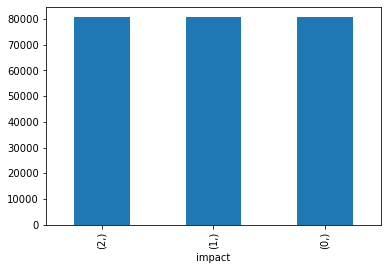

In [182]:
Df=pd.DataFrame(y_train_smote)
Df.value_counts().plot.bar()

# Feature Selection


### Feature Selection using ExtraTreesClassifier

In [183]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_smote,y_train_smote)

ExtraTreesClassifier()

In [184]:
model.feature_importances_

array([8.36235470e-03, 1.28695159e-02, 2.24043562e-03, 4.83636775e-03,
       2.71737059e-02, 1.57802794e-02, 1.40214036e-04, 5.39577865e-03,
       7.86523246e-03, 5.17033478e-03, 4.23053860e-03, 3.07015663e-01,
       5.08469427e-01, 1.86815356e-02, 1.41225303e-02, 7.94470428e-06,
       8.66468319e-03, 4.52051565e-03, 6.00058874e-03, 2.19404946e-04,
       1.26961007e-02, 4.30873165e-03, 4.81126688e-03, 3.81677965e-03,
       3.72942349e-04, 5.92913413e-03, 6.29799348e-03])

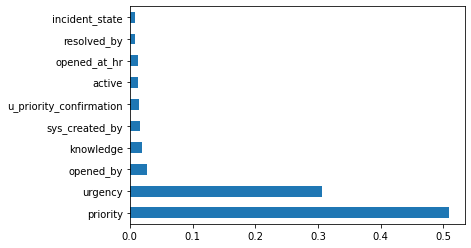

In [185]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Feature Selection using Mutual information

In [186]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_smote, y_train_smote)
mutual_info

array([0.26361408, 0.11316082, 0.49199805, 0.66106026, 0.5062981 ,
       0.34105363, 0.0227395 , 0.15649118, 0.23511658, 0.25789444,
       0.22021689, 0.75163014, 1.08723776, 0.05660882, 0.09938468,
       0.        , 0.3817386 , 0.13105217, 0.09251979, 0.01574487,
       0.16973104, 0.15096459, 0.11239276, 0.10738595, 0.01354097,
       0.13975762, 0.09778835])

In [187]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

priority                   1.087238
urgency                    0.751630
caller_id                  0.661060
opened_by                  0.506298
sys_mod_count              0.491998
resolved_by                0.381739
sys_created_by             0.341054
incident_state             0.263614
subcategory                0.257894
category                   0.235117
u_symptom                  0.220217
opened_at_hr               0.169731
location                   0.156491
opened_at_minute           0.150965
closed_at_hr               0.139758
opened_at_day              0.131052
active                     0.113161
closed_at_day              0.112393
closed_at_month            0.107386
u_priority_confirmation    0.099385
closed_at_minute           0.097788
opened_at_month            0.092520
knowledge                  0.056609
contact_type               0.022740
opened_at_year             0.015745
closed_at_year             0.013541
notify                     0.000000
dtype: float64

<AxesSubplot:>

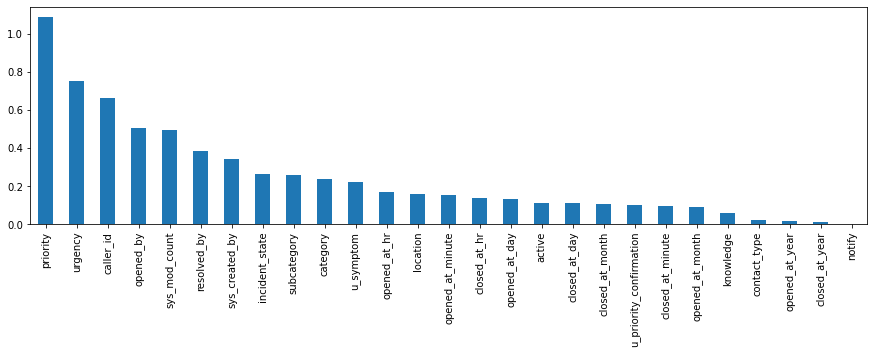

In [188]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4))

### Feature Importance using Decision Tree Classifier

In [189]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [190]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)

priority                   0.983177
urgency                    0.015739
opened_at_minute           0.000224
category                   0.000188
opened_by                  0.000133
closed_at_minute           0.000115
subcategory                0.000086
u_symptom                  0.000076
caller_id                  0.000073
sys_mod_count              0.000049
resolved_by                0.000035
opened_at_hr               0.000027
opened_at_day              0.000021
closed_at_hr               0.000018
incident_state             0.000016
sys_created_by             0.000007
opened_at_month            0.000007
location                   0.000006
active                     0.000003
u_priority_confirmation    0.000000
notify                     0.000000
opened_at_year             0.000000
contact_type               0.000000
closed_at_day              0.000000
closed_at_month            0.000000
closed_at_year             0.000000
knowledge                  0.000000
dtype: float64

<AxesSubplot:>

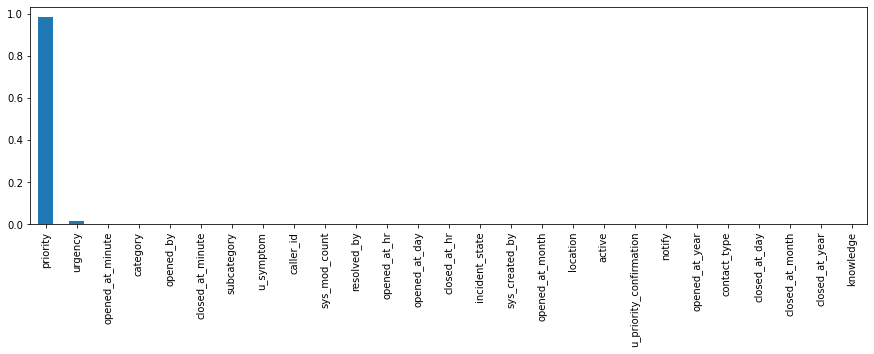

In [191]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))

### Feature Selection using Chi Square

In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [193]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=16)
ordered_feature=ordered_rank_feature.fit(X_train_smote,y_train_smote)
ordered_feature

SelectKBest(k=16, score_func=<function chi2 at 0x000002004C41CDC0>)

In [194]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(15,'scores')

#These are top 10 features useful for predicting impact

,scores,0
4,1.345139e+06,opened_by
3,2.548125e+05,caller_id
5,2.321312e+05,sys_created_by
12,1.618293e+05,priority
11,8.935417e+04,urgency
16,8.107327e+04,resolved_by
26,6.486423e+04,closed_at_minute
9,2.888739e+04,subcategory
17,1.986096e+04,opened_at_day
10,1.653421e+04,u_symptom


In [195]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)

priority                   0.983177
urgency                    0.015739
opened_at_minute           0.000224
category                   0.000188
opened_by                  0.000133
closed_at_minute           0.000115
subcategory                0.000086
u_symptom                  0.000076
caller_id                  0.000073
sys_mod_count              0.000049
resolved_by                0.000035
opened_at_hr               0.000027
opened_at_day              0.000021
closed_at_hr               0.000018
incident_state             0.000016
sys_created_by             0.000007
opened_at_month            0.000007
location                   0.000006
active                     0.000003
u_priority_confirmation    0.000000
notify                     0.000000
opened_at_year             0.000000
contact_type               0.000000
closed_at_day              0.000000
closed_at_month            0.000000
closed_at_year             0.000000
knowledge                  0.000000
dtype: float64

<AxesSubplot:>

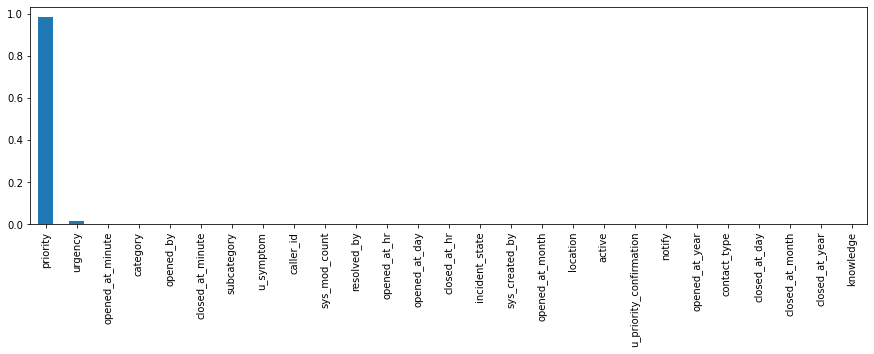

In [196]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))

# Using the important features which we have obtained after feature selection
number,opened_by,sys_created_by,sys_created_by,priority,urgency,resolved_by,closed_at_minute,assigned_to,caller_id



In [198]:
X_test_new= X_test[['opened_by','category','caller_id','subcategory','u_symptom','incident_state','resolved_by','opened_at_day']]
X_train_smote_new= X_train_smote[['opened_by','category','caller_id','subcategory','u_symptom','incident_state','resolved_by','opened_at_day']]

In [199]:
X_train_smote_new.shape

(241956, 8)

In [200]:
X_test_new.shape

(8503, 8)

### RandomForestClassifier

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=27)
model_rf=rf_clf.fit(X_train_smote_new,y_train_smote)

In [202]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test_new)

In [203]:
df=pd.DataFrame(y_predict_rf)

<AxesSubplot:xlabel='0'>

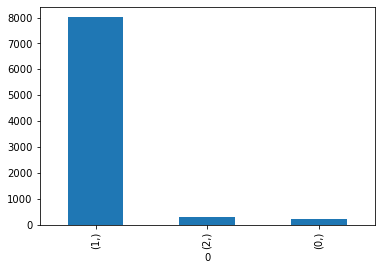

In [204]:
df.value_counts().plot.bar()

In [205]:
df.value_counts()

1    8004
2     282
0     217
dtype: int64

In [206]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9773021286604727
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       224
           1       0.99      0.99      0.99      8035
           2       0.72      0.84      0.78       244

    accuracy                           0.98      8503
   macro avg       0.85      0.87      0.86      8503
weighted avg       0.98      0.98      0.98      8503



In [207]:
cf_matrix=confusion_matrix(y_test,y_predict_rf)
print(cf_matrix)

[[ 179   41    4]
 [  34 7927   74]
 [   4   36  204]]


<AxesSubplot:>

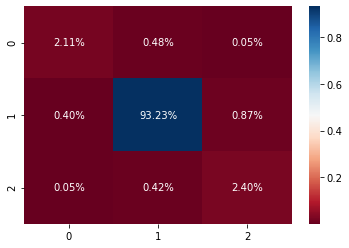

In [208]:
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True, 
            fmt='.2%', cmap='RdBu')

In [209]:
accuracy_rf = (171+7965+184)/(8503)*100

In [210]:
accuracy_rf

97.84781841702929

In [211]:
#Accuracy for training data
model_clf= RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
model_clf.fit(X_train, y_train)

# prediction on test set
y_pred = model_clf.predict(X_train)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_train, y_pred))
cf_matrix=confusion_matrix(y_train,y_pred)
print(cf_matrix)

Accuracy: 1.0
[[ 2098     0     0]
 [    0 80652     0]
 [    0     0  2277]]


### DecisionTreeClassifier

In [212]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
dtree_clf=DecisionTreeClassifier()
model_dtree=dtree_clf.fit(X_train_smote_new,y_train_smote)


In [213]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test_new)

In [214]:
y_predict_dtree

array([1, 1, 1, ..., 1, 1, 1])

In [215]:
df1=pd.DataFrame(y_predict_dtree)

<AxesSubplot:xlabel='0'>

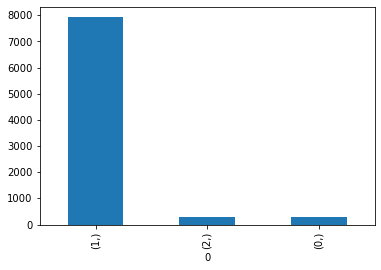

In [216]:
df1.value_counts().plot.bar()

In [217]:
df1.value_counts()

1    7916
2     304
0     283
dtype: int64

In [218]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9668352346230742
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       224
           1       0.99      0.98      0.98      8035
           2       0.63      0.78      0.70       244

    accuracy                           0.97      8503
   macro avg       0.76      0.87      0.81      8503
weighted avg       0.97      0.97      0.97      8503



In [219]:
cfDT_matrix=confusion_matrix(y_test,y_predict_dtree )
print(cfDT_matrix)

[[ 190   29    5]
 [  87 7840  108]
 [   6   47  191]]


<AxesSubplot:>

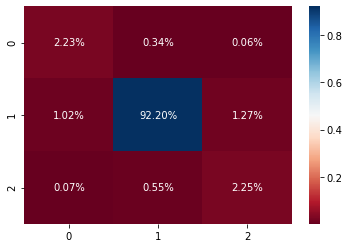

In [220]:
sns.heatmap(cfDT_matrix/np.sum(cfDT_matrix), annot=True, 
            fmt='.2%', cmap='RdBu')

In [221]:
accuracy_dtree = (170+7838+168)/(8503)*100

In [222]:
accuracy_dtree

96.1542984828884

In [223]:
model_dtree=DecisionTreeClassifier()

# Train the model using the training sets
model_dtree.fit(X_train, y_train)

# prediction on test set
y_pred =model_dtree.predict(X_train)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_train, y_pred))
dtree_matrix=confusion_matrix(y_train,y_pred)
print(dtree_matrix)

Accuracy: 1.0
[[ 2098     0     0]
 [    0 80652     0]
 [    0     0  2277]]


### KNN Classification
* The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [224]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10

In [225]:
model_knn=knn.fit(X_train_smote_new,y_train_smote)

In [226]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test_new)

In [227]:
y_predict_knn

array([1, 1, 1, ..., 2, 1, 1])

In [228]:
df2=pd.DataFrame(y_predict_knn)

<AxesSubplot:xlabel='0'>

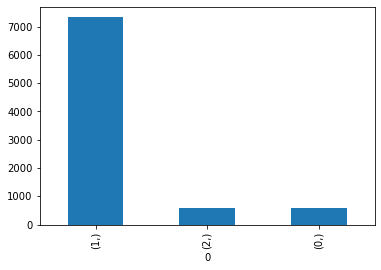

In [229]:
df2.value_counts().plot.bar()

In [230]:
df2.value_counts()

1    7325
2     589
0     589
dtype: int64

In [231]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))


0.9141479477831354
              precision    recall  f1-score   support

           0       0.37      0.98      0.54       224
           1       1.00      0.91      0.95      8035
           2       0.40      0.96      0.56       244

    accuracy                           0.91      8503
   macro avg       0.59      0.95      0.68      8503
weighted avg       0.97      0.91      0.93      8503



In [232]:
cfKNN_matrix=confusion_matrix(y_test,y_predict_knn)
print(cfKNN_matrix)

[[ 219    0    5]
 [ 365 7320  350]
 [   5    5  234]]


<AxesSubplot:>

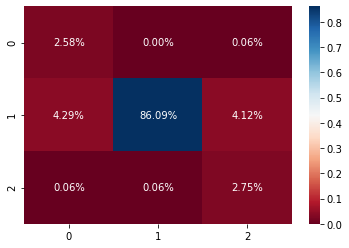

In [233]:
sns.heatmap(cfKNN_matrix/np.sum(cfKNN_matrix), annot=True, 
            fmt='.2%', cmap='RdBu')

In [234]:
accuracy_knn =(218+7395+209)/(8503)*100

In [235]:
accuracy_knn

91.99106197812537

### xgboost Classifier
* XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [236]:
# Training the model
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [237]:
model_xgb=xgb.fit(X_train_smote_new,y_train_smote)

C:\Users\91830\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [238]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test_new)

In [239]:
y_predict_xgb

array([1, 1, 1, ..., 1, 1, 1])

In [240]:
df3=pd.DataFrame(y_predict_xgb)

<AxesSubplot:xlabel='0'>

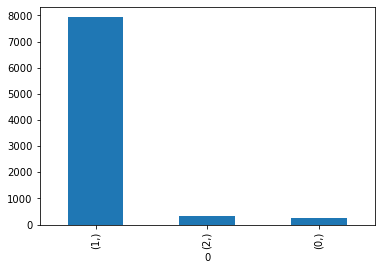

In [241]:
df3.value_counts().plot.bar()

In [242]:
df3.value_counts()

1    7924
2     341
0     238
dtype: int64

In [243]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9608373515229919
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       224
           1       0.99      0.97      0.98      8035
           2       0.59      0.82      0.69       244

    accuracy                           0.96      8503
   macro avg       0.74      0.83      0.77      8503
weighted avg       0.97      0.96      0.96      8503



In [244]:
cfXGB_matrix=confusion_matrix(y_test,y_predict_xgb)
print(cfXGB_matrix)

[[ 152   68    4]
 [  82 7817  136]
 [   4   39  201]]


<AxesSubplot:>

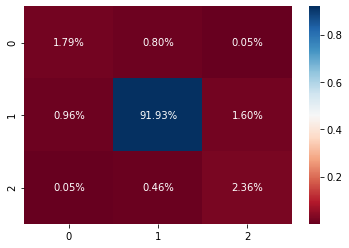

In [245]:
sns.heatmap(cfXGB_matrix/np.sum(cfXGB_matrix), annot=True, 
            fmt='.2%', cmap='RdBu')

In [246]:
accuracy_XGB=(148+7854+193)/(8503)*100

In [247]:
accuracy_XGB

96.3777490297542

In [248]:
XGB = XGBClassifier()
# Train the model using the training sets
XGB.fit(X_train, y_train)

# prediction on test set
y_pred = XGB.predict(X_train)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_train, y_pred))
XGB_matrix=confusion_matrix(y_train,y_pred)
print(XGB_matrix)

C:\Users\91830\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 1.0
[[ 2098     0     0]
 [    0 80652     0]
 [    0     0  2277]]


### multilayer perceptron (MLP)
* used to create mathematical models by regression analysis.
* As classification is a particular case of regression when the response variable is categorical, MLPs make good classifier algorithms.

In [249]:
# Training the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [ ]:
model_mlp=mlp.fit(X_train_smote_new,y_train_smote)

In [251]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test_new)

In [252]:
y_predict_mlp

array([1, 0, 1, ..., 1, 1, 1])

In [253]:
df4=pd.DataFrame(y_predict_mlp)

<AxesSubplot:xlabel='0'>

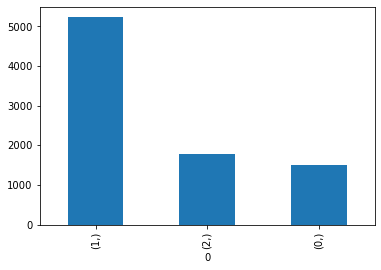

In [254]:
df4.value_counts().plot.bar()

In [255]:
df4.value_counts()

1    5228
2    1770
0    1505
dtype: int64

In [256]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.6416558861578266
              precision    recall  f1-score   support

           0       0.09      0.63      0.16       224
           1       0.98      0.64      0.77      8035
           2       0.11      0.79      0.19       244

    accuracy                           0.64      8503
   macro avg       0.39      0.69      0.38      8503
weighted avg       0.93      0.64      0.74      8503



In [257]:
cfmlp_matrix=confusion_matrix(y_test,y_predict_mlp)
print(cfmlp_matrix)

[[ 141   62   21]
 [1357 5122 1556]
 [   7   44  193]]


<AxesSubplot:>

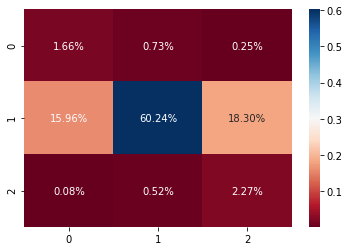

In [258]:
sns.heatmap(cfmlp_matrix/np.sum(cfmlp_matrix), annot=True, 
            fmt='.2%', cmap='RdBu')

In [259]:
accuracy_mlp = (165+4772+176)/(8503)*100

In [260]:
accuracy_mlp

60.13171821709985

In [261]:
model_mlp= MLPClassifier()
# Train the model using the training sets
model_mlp.fit(X_train, y_train)

# prediction on test set
y_pred = model_mlp.predict(X_train)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_train, y_pred))
model_mlp_matrix=confusion_matrix(y_train,y_pred)
print(model_mlp_matrix)

Accuracy: 0.9923436085008291
[[ 1837   261     0]
 [   53 80507    92]
 [    0   245  2032]]


###  Naive Bayes 

   * GaussianNb===> It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.
    
    
   * Multinomial Naive Bayes algorithm ====>is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.

In [262]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [263]:
sgnb = GaussianNB()
smnb = MultinomialNB()

In [264]:
spred_gnb = sgnb.fit(X_train_smote_new,y_train_smote)

In [265]:
# Predicting the model
y_predict_sgnb = spred_gnb.predict(X_test_new)

In [266]:
y_predict_sgnb

array([0, 0, 2, ..., 2, 2, 2])

In [267]:
df5=pd.DataFrame(y_predict_sgnb)

<AxesSubplot:xlabel='0'>

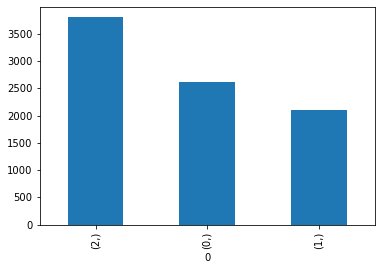

In [268]:
df5.value_counts().plot.bar()

In [269]:
df5.value_counts()

2    3798
0    2611
1    2094
dtype: int64

In [270]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_sgnb))
print(classification_report(y_test,y_predict_sgnb))

0.2684934728919205
              precision    recall  f1-score   support

           0       0.04      0.46      0.07       224
           1       0.96      0.25      0.40      8035
           2       0.04      0.67      0.08       244

    accuracy                           0.27      8503
   macro avg       0.35      0.46      0.18      8503
weighted avg       0.91      0.27      0.38      8503



In [271]:
cfsgnb_matrix=confusion_matrix(y_test,y_predict_sgnb )
print(cfsgnb_matrix)

[[ 103   38   83]
 [2468 2016 3551]
 [  40   40  164]]


<AxesSubplot:>

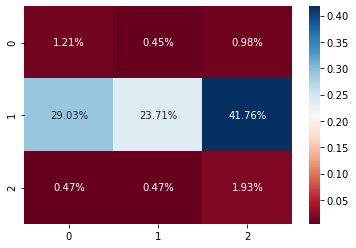

In [272]:
sns.heatmap(cfsgnb_matrix/np.sum(cfsgnb_matrix), annot=True, 
            fmt='.2%', cmap='RdBu')

In [273]:
accuracy_gnb = (86+2097+144)/(8503)*100

In [274]:
accuracy_gnb

27.366811713512877

In [ ]:
spred_gnb= MLPClassifier()
# Train the model using the training sets
model_mlp.fit(X_train, y_train)

# prediction on test set
y_pred = model_mlp.predict(X_train)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_train, y_pred))
model_mlp_matrix=confusion_matrix(y_train,y_pred)
print(model_mlp_matrix)

In [ ]:
spred_mnb = smnb.fit(X_train_smote_new,y_train_smote)

In [ ]:
# Predicting the model
y_predict_smnb = spred_mnb.predict(X_test_new)

In [ ]:
y_predict_smnb

In [ ]:
df6=pd.DataFrame(y_predict_smnb)

In [ ]:
df6.value_counts().plot.bar()

In [ ]:
df6.value_counts()

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_smnb))
print(classification_report(y_test,y_predict_smnb))

In [ ]:
cfmnb_matrix=confusion_matrix(y_test,y_predict_smnb)
print(cfmnb_matrix)

In [ ]:
sns.heatmap(cfmnb_matrix/np.sum(cfmnb_matrix), annot=True, 
            fmt='.2%', cmap='RdBu')

In [ ]:
accuracy_mnb =(89+1540+161)/(8503)*100

In [ ]:
accuracy_mnb 

In [ ]:
model_mlp= MLPClassifier()
# Train the model using the training sets
model_mlp.fit(X_train, y_train)

# prediction on test set
y_pred = model_mlp.predict(X_train)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_train, y_pred))
model_mlp_matrix=confusion_matrix(y_train,y_pred)
print(model_mlp_matrix)

In [ ]:
data = {"MODEL":pd.Series(["model_rf","model_dtree","model_xgb","model_knn","model_mlp","spred_gnb ","spred_mnb"]),
        "Accuracy":pd.Series([accuracy_rf,accuracy_dtree,accuracy_XGB,accuracy_knn,accuracy_mlp,accuracy_gnb,accuracy_mnb])}
table=pd.DataFrame(data)
table

In [ ]:
import pickle as p
p_out  = open("model_rf.pkl","wb")
p.dump(model_rf, p_out)
p_out.close()